In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# data = pd.read_csv('monthly_data.csv')

# X = data.iloc[:, 1:-1].values
# y = data.iloc[:, -1].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [3]:
# model = MLPRegressor(hidden_layer_sizes=(128), activation='relu', solver='lbfgs', max_iter=100000, random_state=42)
# model.fit(X_train, y_train)

In [4]:
# y_pred = model.predict(X_test)
# print("MSE:", mean_squared_error(y_test, y_pred))
# print("R2 score:", r2_score(y_test, y_pred))

In [5]:
# import pickle

# pickle.dump(scaler, open('monthly_scaler.pkl', 'wb'))
# pickle.dump(model, open('ANN_monthly.pkl', 'wb'))

In [6]:
import pickle

scaler = pickle.load(open('monthly_scaler.pkl', 'rb'))
model = pickle.load(open('ANN_monthly.pkl', 'rb'))

In [7]:
df1 = pd.read_csv('monthly_dataset.csv')

df1.head()

,Year,Month,Date,Population (million),Temperature (celsius),CPI,GDP (million bahts),Peak Load (MW),Generation (GWh),Consumption (GWh)
0,2002,Jan,2002-Jan,63.25,26.45,70.23,480343.33,14552.5,8261.93,7326.80
1,2002,Feb,2002-Feb,63.21,26.49,70.23,480343.33,15260.8,8187.95,7359.06
2,2002,Mar,2002-Mar,63.17,26.52,70.23,480343.33,16485.3,9687.11,8471.25
3,2002,Apr,2002-Apr,63.13,26.55,70.23,470404.67,16681.1,9378.36,8461.08
4,2002,May,2002-May,63.09,26.58,70.07,470404.67,16293.1,9654.67,8730.29


In [8]:
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y-%b')
df1.set_index('Date', inplace=True)

df1.head()

,Year,Month,Population (million),Temperature (celsius),CPI,GDP (million bahts),Peak Load (MW),Generation (GWh),Consumption (GWh)
Date,,,,,,,,,
2002-01-01,2002,Jan,63.25,26.45,70.23,480343.33,14552.5,8261.93,7326.80
2002-02-01,2002,Feb,63.21,26.49,70.23,480343.33,15260.8,8187.95,7359.06
2002-03-01,2002,Mar,63.17,26.52,70.23,480343.33,16485.3,9687.11,8471.25
2002-04-01,2002,Apr,63.13,26.55,70.23,470404.67,16681.1,9378.36,8461.08
2002-05-01,2002,May,63.09,26.58,70.07,470404.67,16293.1,9654.67,8730.29


In [9]:
X1 = df1.iloc[:, 2:-3].values
y  = df1.iloc[:, -3].values

X1.shape, y.shape

((252, 4), (252,))

In [10]:
y_pred = model.predict(scaler.transform(X1))

y_pred.shape

(252,)

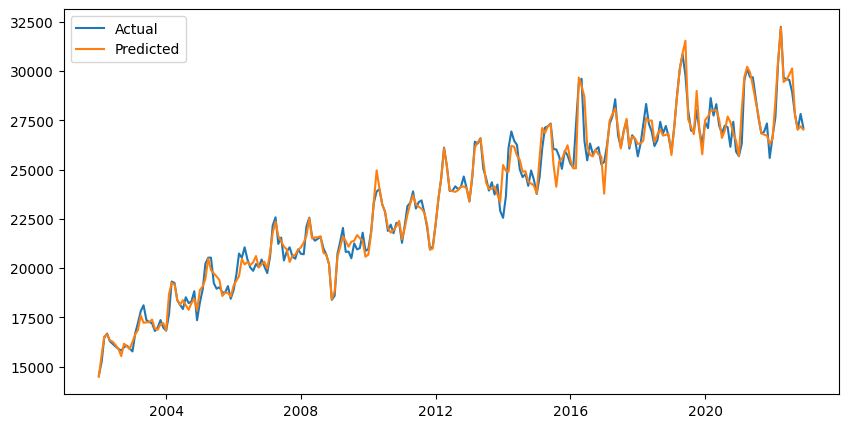

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(df1.index, y, label='Actual')
plt.plot(df1.index, y_pred, label='Predicted')
plt.legend()
plt.show()

In [12]:
df2 = pd.read_csv('Assume_features.csv')

df2.head()

,Date,Year,Month,GDP2,GDP3,GDP4,Population005,Population01,Population015,CPI2,CPI3,CPI4,Temperature
0,2023-01,2023,1,925573.3889,926343.4166,927113.4444,66.092754,66.095507,66.098261,106.647450,106.736175,106.824900,26.584549
1,2023-02,2023,2,927116.0112,928659.2752,930203.8226,66.095508,66.101015,66.106524,106.825196,107.003015,107.180983,26.393308
2,2023-03,2023,3,928661.2045,930980.9234,933304.5020,66.098262,66.106524,66.114787,107.003238,107.270523,107.538253,26.543848
3,2023-04,2023,4,930208.9732,933308.3757,936415.5170,66.101016,66.112033,66.123051,107.181577,107.538699,107.896714,26.605915
4,2023-05,2023,5,931759.3215,935641.6466,939536.9020,66.103770,66.117542,66.131317,107.360212,107.807546,108.256370,26.672819


In [13]:
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y-%m')
df2.set_index('Date', inplace=True)

df2.head()

,Year,Month,GDP2,GDP3,GDP4,Population005,Population01,Population015,CPI2,CPI3,CPI4,Temperature
Date,,,,,,,,,,,,
2023-01-01,2023,1,925573.3889,926343.4166,927113.4444,66.092754,66.095507,66.098261,106.647450,106.736175,106.824900,26.584549
2023-02-01,2023,2,927116.0112,928659.2752,930203.8226,66.095508,66.101015,66.106524,106.825196,107.003015,107.180983,26.393308
2023-03-01,2023,3,928661.2045,930980.9234,933304.5020,66.098262,66.106524,66.114787,107.003238,107.270523,107.538253,26.543848
2023-04-01,2023,4,930208.9732,933308.3757,936415.5170,66.101016,66.112033,66.123051,107.181577,107.538699,107.896714,26.605915
2023-05-01,2023,5,931759.3215,935641.6466,939536.9020,66.103770,66.117542,66.131317,107.360212,107.807546,108.256370,26.672819


In [14]:
X2_base = df2[['Population005', 'Temperature', 'CPI2', 'GDP2']].values
X2_mid = df2[['Population01', 'Temperature', 'CPI3', 'GDP3']].values
X2_high = df2[['Population015', 'Temperature', 'CPI4', 'GDP4']].values

X2_base.shape, X2_mid.shape, X2_high.shape

((120, 4), (120, 4), (120, 4))

In [15]:
X_base = np.concatenate((X1, X2_base), axis=0)
X_mid = np.concatenate((X1, X2_mid), axis=0)
X_high = np.concatenate((X1, X2_high), axis=0)

X_base.shape, X_mid.shape, X_high.shape

((372, 4), (372, 4), (372, 4))

In [16]:
base_pred = model.predict(scaler.transform(X_base))
mid_pred = model.predict(scaler.transform(X_mid))
high_pred = model.predict(scaler.transform(X_high))

base_pred.shape, mid_pred.shape, high_pred.shape

((372,), (372,), (372,))

In [17]:
date_array = pd.date_range(start=df1.index[0], end=df2.index[-1], freq='MS')

len(date_array)

372

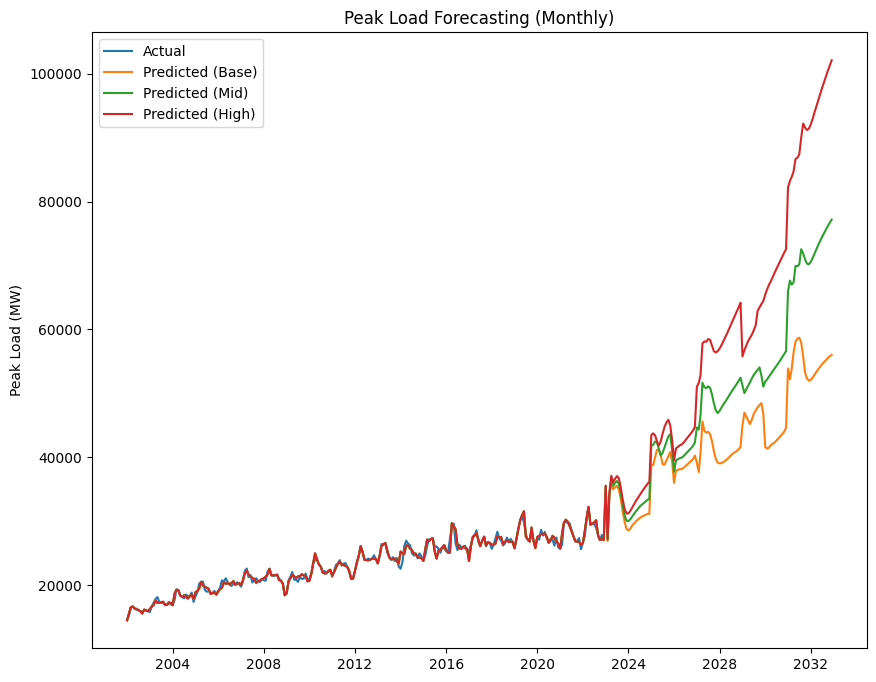

In [18]:
plt.figure(figsize=(10, 8))
plt.plot(df1.index, y, label='Actual')
plt.plot(date_array, base_pred, label='Predicted (Base)')
plt.plot(date_array, mid_pred, label='Predicted (Mid)')
plt.plot(date_array, high_pred, label='Predicted (High)')
plt.ylabel('Peak Load (MW)')
plt.title('Peak Load Forecasting (Monthly)')
plt.legend()
plt.show()